In [245]:
from tkinter import *
from tkinter import ttk
import serial
import matplotlib.pyplot as plt
ser = serial.Serial('COM3',  baudrate=115200, timeout=1)

In [246]:
root = Tk()
root.geometry('820x820')
root['bg']="#333"
ca = Canvas(root, width=800, height=800)
ca.place(x=8,y=8)

timestr=StringVar()
lb=Label(root,textvariable=timestr)
lb.place(x=20,y=20,height=30)
style=ttk.Style(root)
style.configure(".",font="Arial 15")

dd = [0]*200
outdata = [0]*191
newdd = [0]*199

def tt():
    global dd
    global outdata
    global newdd
    ca.delete("all")
    
    for i in range(199):
        dd[i] = dd[i+1]
    dd[199] = int(ser.readline())
    '''
    for i in range(198):
        newdd[i] = ( dd[i] + dd[i+1] )/2    
        
    for i in range(190):
        outdata[i] = 400 - ( newdd[i+6] - newdd[i] ) / 4
        #if outdata[i]>300 and outdata[i]<520:
            #outdata[i] = ( outdata[i] - 400 ) * 0.1 + 400
    '''
    for i in range(190):
        outdata[i] = 400 - ( dd[i+1] - dd[i] ) / 4
    print( outdata[100] )
    
   #----------------------------------------
    
    x=0
    pxmax=0
    pmax=0
    pxmin=0
    pmin=65535
    plv=300
    dr=1
    ax,ay=[],[]

    for p in outdata:
        if dr==1:
            if p>pmax:
                pmax=p
                pxmax=x
            else:
                d=pmax-p
                if d > plv:
                    #print(x,pxmax,pmax)
                    dr=0      
                    ax+=[pxmax]
                    ay+=[pmax]
                    pmin=pmax
        else:
            if p<pmin:
                pmin=p
                pxmin=x     
            else:
                d=p-pmin
                if d > plv:
                    #print(x,pxmin,pmin)
                    pmax=pmin
                    dr=1
        x+=1
    #print( ax )
    #print( "-----------" )
    
    #----------------------------------------
    
    dx=[]
    for i in range( len(ax)-1 ):
        dx += [ ax[i+1]-ax[i] ] 
    
    sumdx = sum(dx)
    if sumdx==0:
        sumdx=1      
    
    lendx = len(dx)
    if lendx==0:
        lendx=1    
      
    PPG = round(60*50 / (sumdx/lendx) )
    if PPG==3000:
        PPG=0  
    #print(PPG)  
    timestr.set(PPG)
    
    #----------------------------------------      
    
    xy=[]
    for i in range(len(outdata)):
        xy += ( 800-i*6 , outdata[i] )           
    ca.create_line(xy, width=2, fill='blue')    
    
      
    ca.after(1, tt)

ca.after(1, tt)

mainloop()

400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
400.0
-26633.0
413.75
440.75
436.0
429.75
422.0
405.5
406.0
388.5
398.0
393.5
391.75
390.25
398.0
404.5
407.0
411.75
407.0
402.0
397.75
398.5
387.75
379.5
396.0
388.25
395.75
391.5
389.25
386.5
386.75
396.5
389.0
395.5
398.5
387.5
394.25
413.0
446.25
457.0
434.5
429.5
412.0
406.75
400.75
392.0
389.25
396.5
389.5
396.0
400.75
403.75
405.25
405.0
404.5
399.0
395.25
393.0
385.75
387.25
383.5
388.5
391.25
398.0
401.0
3

403.25
396.25
395.25
394.75
406.25
442.5
488.0
491.75
458.25
411.75
376.75
370.0
368.5
379.25
382.75
390.0
378.5
380.5
389.5
400.75
402.25
407.75
394.75
395.25
379.5
385.0
382.75
381.75
384.75
393.5
385.25
391.25
389.0
396.75
390.5
394.5
397.75
400.5
401.0
399.0
397.0
406.5
388.25
422.75
433.75
448.5
452.5
427.0
395.25
380.75
373.75
390.75
382.5
390.25
388.75
381.25
394.5
389.5
397.0
399.5
400.5
406.0
395.5
393.25
398.5
393.25
389.75
391.25
390.5
403.25
397.0
396.0
400.75
397.5
400.25
400.5
401.75
401.0
397.0
401.75
388.0
385.25
399.0
400.75
422.25
442.5
447.75
441.75
408.25
397.5
377.5
375.75
391.0
385.75
383.25
388.5
387.5
404.75
398.0
405.75
410.0
400.25
403.0
394.75
396.5
388.5
393.0
397.5
395.5
393.75
404.75
393.5
395.0
397.25
397.75
400.75
398.0
395.75
394.0
383.75
398.25
388.75
398.5
422.25
439.5
447.5
429.25
405.75
400.25
382.25
385.25
383.0
382.5
390.0
391.25
399.75
406.75
403.25
415.0
408.0
403.5
396.5
392.75
395.0
384.25
386.5
397.25
391.75
403.5
395.25
391.25
388.0
394.25
3

In [58]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

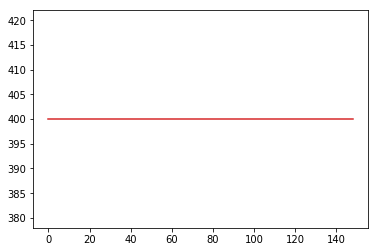

In [174]:
ACdata1 = [0]*200

for i in range(187):
    ACdata1[i] = 400 - ( newdd[i+1] - newdd[i] )
    
plt.plot(ACdata1[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

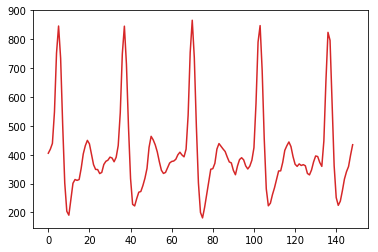

In [132]:
ACdata2 = [0]*200

for i in range(187):
    ACdata2[i] = 400 - ( newdd[i+2] - newdd[i] )
    
plt.plot(ACdata2[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

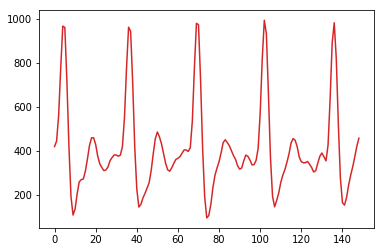

In [133]:
ACdata3 = [0]*200

for i in range(187):
    ACdata3[i] = 400 - ( newdd[i+3] - newdd[i] )
    
plt.plot(ACdata3[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

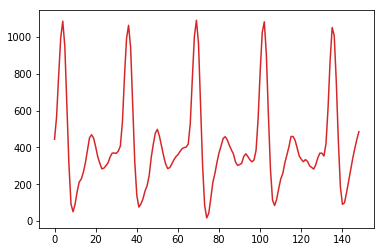

In [134]:
ACdata4 = [0]*200

for i in range(187):
    ACdata4[i] = 400 - ( newdd[i+4] - newdd[i] )
    
plt.plot(ACdata4[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

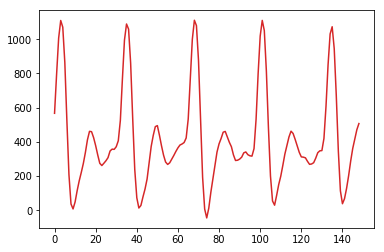

In [135]:
ACdata5 = [0]*200

for i in range(187):
    ACdata5[i] = 400 - ( newdd[i+5] - newdd[i] )
    
plt.plot(ACdata5[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

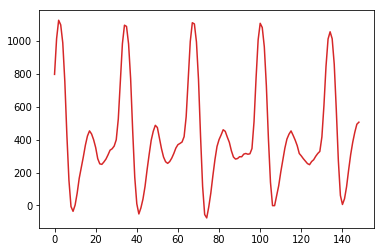

In [136]:
ACdata6 = [0]*200

for i in range(187):
    ACdata6[i] = 400 - ( newdd[i+6] - newdd[i] )
    
plt.plot(ACdata6[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

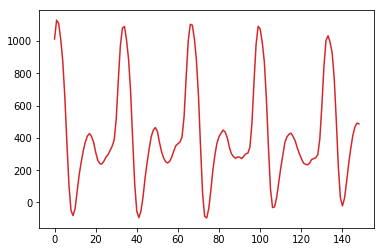

In [137]:
ACdata7 = [0]*200

for i in range(187):
    ACdata7[i] = 400 - ( newdd[i+7] - newdd[i] )
    
plt.plot(ACdata7[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

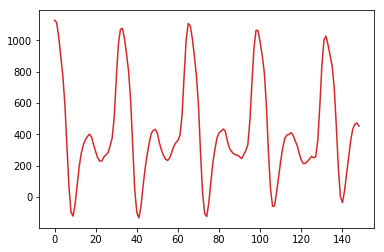

In [138]:
ACdata8 = [0]*200

for i in range(187):
    ACdata8[i] = 400 - ( newdd[i+8] - newdd[i] )
    
plt.plot(ACdata8[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

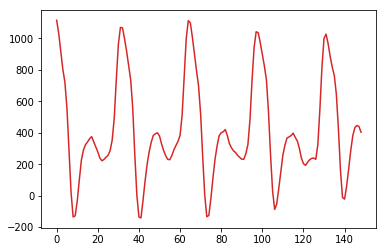

In [139]:
ACdata9 = [0]*200

for i in range(187):
    ACdata9[i] = 400 - ( newdd[i+9] - newdd[i] )
    
plt.plot(ACdata9[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

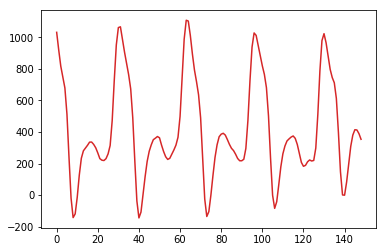

In [140]:
ACdata10 = [0]*200

for i in range(187):
    ACdata10[i] = 400 - ( newdd[i+10] - newdd[i] )
    
plt.plot(ACdata10[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

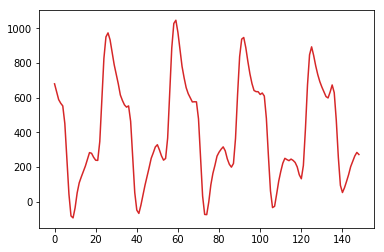

In [141]:
ACdata15 = [0]*200

for i in range(169):
    ACdata15[i] = 400 - ( newdd[i+15] - newdd[i] )
    
plt.plot(ACdata15[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

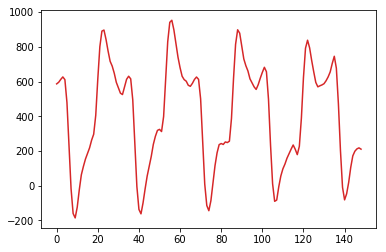

In [142]:
ACdata18 = [0]*200

for i in range(169):
    ACdata18[i] = 400 - ( newdd[i+18] - newdd[i] )
    
plt.plot(ACdata18[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

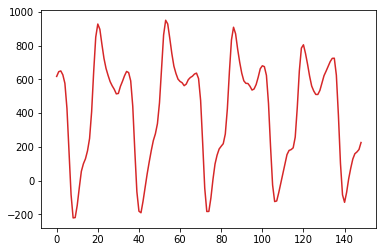

In [143]:
ACdata20 = [0]*200

for i in range(169):
    ACdata20[i] = 400 - ( newdd[i+20] - newdd[i] )
    
plt.plot(ACdata20[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

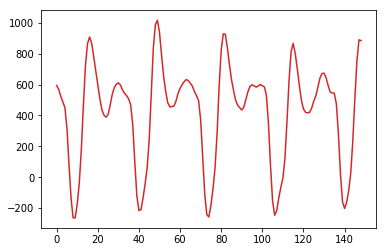

In [144]:
ACdata25 = [0]*200

for i in range(169):
    ACdata25[i] = 400 - ( newdd[i+25] - newdd[i] )
    
plt.plot(ACdata25[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

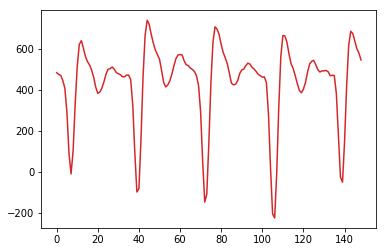

In [145]:
ACdata30 = [0]*200

for i in range(169):
    ACdata30[i] = 400 - ( newdd[i+30] - newdd[i] )
    
plt.plot(ACdata30[0:149],color='tab:red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

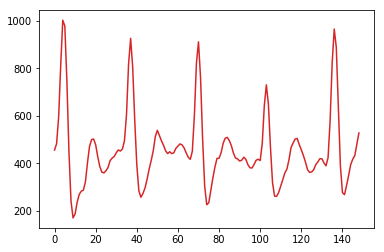

In [146]:
ACdata35 = [0]*200

for i in range(160):
    ACdata35[i] = 400 - ( newdd[i+35] - newdd[i] )
    
plt.plot(ACdata35[0:149],color='tab:red')
plt.show

j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10


<function matplotlib.pyplot.show(*args, **kw)>

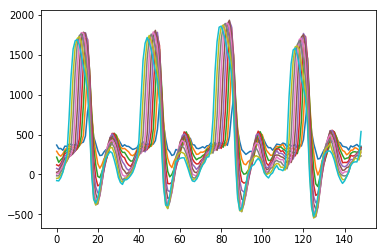

In [219]:
ACdatai = [0]*200

for j in range(1,11):
    for i in range(160):
        ACdatai[i] = 400 - ( dd[i+j] - dd[i] )
    plt.plot(ACdatai[0:149])
    print("j=",j)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

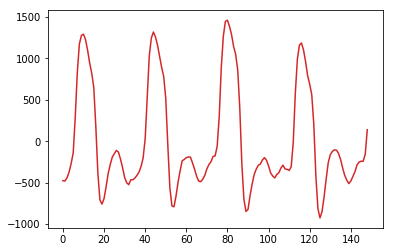

In [240]:
ACdata1 = [0]*200

j=10


for i in range(160):
    ACdata1[i] = 0 - ( dd[i+j] - dd[i] )
    
plt.plot(ACdata1[0:149],color='tab:red')
plt.show